In [3]:
# import Python library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [9]:
# Load the Excel file
df = pd.read_csv(r'C:\Users\rajku\OneDrive\Documents\Warehouse_and_Retail_Sales.csv')  

C:\Users\rajku\AppData\Local\Temp\ipykernel_7112\3375019729.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\rajku\OneDrive\Documents\Warehouse_and_Retail_Sales.csv')


In [11]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,NaN,NaN,NaN
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,NaN,NaN,NaN
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,NaN,NaN,NaN
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,NaN,NaN,NaN
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,NaN,NaN,NaN


In [13]:
df.shape

(307645, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
 9   Unnamed: 9        0 non-null       float64
 10  Unnamed: 10       0 non-null       float64
 11  Unnamed: 11       1 non-null       object 
dtypes: float64(5), int64(2), object(5)
memory usage: 28.2+ MB


In [15]:
#drop unrelated/blank columns
df.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)

In [16]:
#check for null values
pd.isnull(df).sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [17]:
# drop null values
df.dropna(inplace=True)

In [20]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,2018.438238,6.424064,7.003644,6.938177,25.375561
std,1.083080,3.461853,30.387012,30.244239,249.500572
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.260000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [ ]:
# use describe() for specific columns
df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].describe()

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307477.000000,307477.000000,307477.000000
mean,7.003644,6.938177,25.375561
std,30.387012,30.244239,249.500572
min,-6.490000,-38.490000,-4996.000000
25%,0.000000,0.000000,0.000000
50%,0.320000,0.000000,1.000000
75%,3.260000,3.000000,5.000000
max,1816.490000,1990.830000,18317.000000


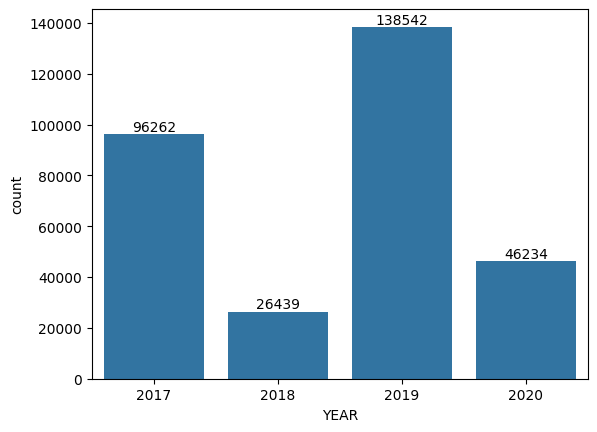

In [23]:
# plotting a bar chart for YEAR and it's count

ax = sns.countplot(x = 'YEAR',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='YEAR', ylabel='RETAIL SALES'>

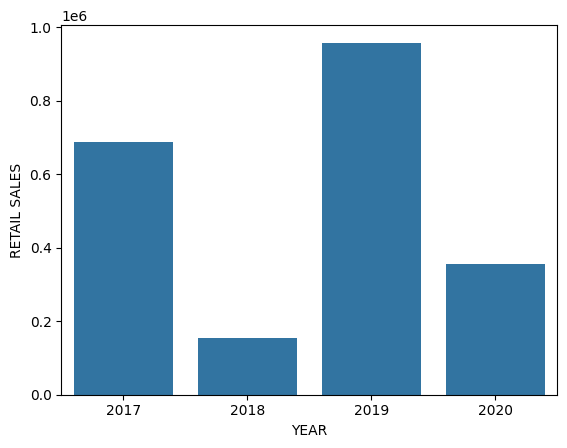

In [24]:
# plotting a bar chart for YEAR vs RETAIL SALES

sales_gen = df.groupby(['YEAR'], as_index=False)['RETAIL SALES'].sum().sort_values(by='RETAIL SALES', ascending=False)

sns.barplot(x = 'YEAR',y= 'RETAIL SALES' ,data = sales_gen)

<Axes: xlabel='MONTH', ylabel='RETAIL SALES'>

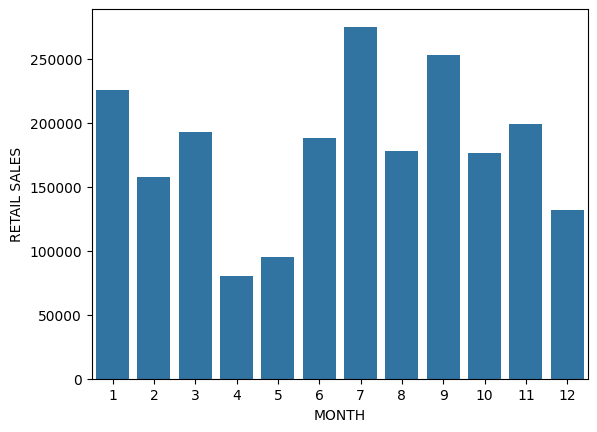

In [25]:
# plotting a bar chart for YEAR vs RETAIL SALES

sales_gen = df.groupby(['MONTH'], as_index=False)['RETAIL SALES'].sum().sort_values(by='RETAIL SALES', ascending=False)

sns.barplot(x = 'MONTH',y= 'RETAIL SALES' ,data = sales_gen)

<Axes: xlabel='YEAR', ylabel='WAREHOUSE SALES'>

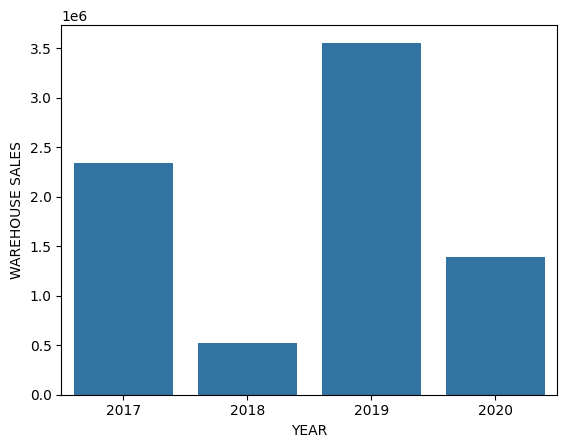

In [26]:
# plotting a bar chart for YEAR vs RETAIL SALES

sales_gen = df.groupby(['YEAR'], as_index=False)['WAREHOUSE SALES'].sum().sort_values(by='WAREHOUSE SALES', ascending=False)

sns.barplot(x = 'YEAR',y= 'WAREHOUSE SALES' ,data = sales_gen)